# pandas fundamentals exercises

---
These are introductory exercises in Pandas with focus in **syntax, DataFrame, indexing, data selection** and **data cleaning**.

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Cities in Sweden - create dataset (*)

Create this DataFrame from scratch: 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Malmö     |       347949 |
|  1 | Stockholm |       975551 |
|  2 | Uppsala   |       233839 |
|  3 | Göteborg  |       583056 |

&nbsp; a) Use your DataFrame to print out all the cities. (*)

&nbsp; b) Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the three largest cities. (*)

&nbsp; e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city. 


<details>

<summary>Answer</summary>

a) 

```
0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
```

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |
|  3 | Uppsala   |       233839 |


d)

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |

e)

|    | Kommun    |   Population |   Population (%) |
|---:|:----------|-------------:|-----------------:|
|  0 | Stockholm |       975551 |              9.4 |
|  1 | Göteborg  |       583056 |              5.6 |
|  2 | Malmö     |       347949 |              3.4 |
|  3 | Uppsala   |       233839 |              2.3 |

</details>


In [197]:
import pandas as pd
import numpy as np
# question a)

cities_dict = {"City": ["Malmö", "Stockholm","Uppsala","Göteborg"], "Population":[347949,975551,233839,583056]}
cities_series = pd.Series(cities_dict)
df_cities = pd.DataFrame(cities_dict)

df_cities


,City,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [198]:
# question b)
df_cities.loc[df_cities["City"] == "Göteborg", "Population"].values[0]


583056

In [199]:
# question c)
sort_population = df_cities.sort_values(by= "Population", ascending = False) # sorting into population order, i defined population even though it is the only variable
sort_population 

,City,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


In [200]:
# question d)
df_remove_3largest = sort_population.iloc[3:]
df_remove_3largest

,City,Population
2,Uppsala,233839


In [201]:
# question e)
Population_percent = pd.Series(df_cities["Population"] / 10379295 * 100).round(1) # This will create a series to add to the data frame.

df_cities["Population_%"] = Population_percent

df_cities


,City,Population,Population_%
0,Malmö,347949,3.4
1,Stockholm,975551,9.4
2,Uppsala,233839,2.3
3,Göteborg,583056,5.6


---

## 2. Cities in Sweden - real dataset (*)

Go into [this page][scb_pop50], scroll down and download the Excel file containing Swedish population dataset from SCB.

[scb_pop50]: https://www.scb.se/hitta-statistik/statistik-efter-amne/befolkning/befolkningens-sammansattning/befolkningsstatistik/pong/tabell-och-diagram/topplistor-kommuner/folkmangd-topp-50/

&nbsp; a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

```python
df.head()
df.info()
df.describe()
```

Feel free to do more explorations. (*)

&nbsp; b) Clean your data so that the head looks like this: (*)


|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
|  0 |          83 |          84 | Ale      |            31868 |            31402 |     1.48398  |
|  1 |          64 |          64 | Alingsås |            41602 |            41420 |     0.439401 |
|  2 |         123 |         123 | Alvesta  |            20224 |            20134 |     0.447005 |
|  3 |         255 |         255 | Aneby    |             6821 |             6848 |    -0.394276 |
|  4 |         169 |         167 | Arboga   |            14039 |            14087 |    -0.34074  |

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the five smallest cities. (*)

&nbsp; e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)

&nbsp; f) Plot a bar chart for the five largest cities and the five smallest cities. (*) 

<details>

<summary>Hint</summary>

a) Use
```python
pd.read_excel(path, header = ..., usecols="Letter1:LetterN", sheet_name="...")
```

</details>

<details>

<summary>Answer</summary>

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 


|    |   Rang 2020 |   Rang 2019 | Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:----------|-----------------:|-----------------:|-------------:|
|  0 |           1 |           1 | Stockholm |           975551 |           974073 |     0.151734 |
|  1 |           2 |           2 | Göteborg  |           583056 |           579281 |     0.65167  |
|  2 |           3 |           3 | Malmö     |           347949 |           344166 |     1.09918  |
|  3 |           4 |           4 | Uppsala   |           233839 |           230767 |     1.33121  |
|  4 |           5 |           5 | Linköping |           164616 |           163051 |     0.959822 |


d)

|     |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|----:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
| 289 |         290 |         290 | Bjurholm |             2387 |             2408 |    -0.872093 |
| 288 |         289 |         289 | Sorsele  |             2442 |             2489 |    -1.88831  |
| 287 |         288 |         288 | Dorotea  |             2498 |             2551 |    -2.07762  |
| 286 |         287 |         287 | Arjeplog |             2718 |             2785 |    -2.40575  |
| 285 |         286 |         286 | Åsele    |             2805 |             2794 |     0.393701 |

e)

```
Populationen i Sverige 2020: 10379295
Populationen i Sverige 2019: 10327589
```

f)

<img align="left" src="../assets/city_sizes.png" height="200"/>

</details>


In [202]:
import pandas as pnd
import matplotlib.pyplot as plt
import seaborn as sns

df_pop = pd.read_excel("../Data/komtopp50_2020.xlsx", skiprows = 6)
df_pop.head()


,2020,2019,Unnamed: 2,2020.1,2019.1,Unnamed: 5
0,1,1,Stockholm,975551,974073,1478
1,2,2,Göteborg,583056,579281,3775
2,3,3,Malmö,347949,344166,3783
3,4,4,Uppsala,233839,230767,3072
4,5,5,Linköping,164616,163051,1565


In [203]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   2020        50 non-null     int64 
 1   2019        50 non-null     int64 
 2   Unnamed: 2  50 non-null     object
 3   2020.1      50 non-null     int64 
 4   2019.1      50 non-null     int64 
 5   Unnamed: 5  50 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


In [204]:
df_pop.describe()

,2020,2019,2020.1,2019.1,Unnamed: 5
count,50.00000,50.00000,50.000000,50.000000,50.000000
mean,25.50000,25.50000,124548.940000,123740.320000,808.620000
std,14.57738,14.57738,150014.946636,149527.168738,860.913158
min,1.00000,1.00000,48678.000000,48333.000000,-196.000000
25%,13.25000,13.25000,63751.000000,62911.250000,265.000000
50%,25.50000,25.50000,85573.500000,85071.000000,536.000000
75%,37.75000,37.75000,113594.000000,113096.250000,1111.750000
max,50.00000,50.00000,975551.000000,974073.000000,3783.000000


In [205]:
df_pop.shape

(50, 6)

In [206]:
df_pop.rename(
    columns={2020 : "Range 2020", 2019 : "Range 2019", "Unnamed: 2" : "County", 
    "2020.1" : "Population 2020", "2019.1" : "Population 2019", "Unnamed: 5" : "Difference"},inplace=True,) # replacing the titles of the columns

df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Range 2020       50 non-null     int64 
 1   Range 2019       50 non-null     int64 
 2   County           50 non-null     object
 3   Population 2020  50 non-null     int64 
 4   Population 2019  50 non-null     int64 
 5   Difference       50 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


In [207]:
# cleaned data
df_pop.head()

,Range 2020,Range 2019,County,Population 2020,Population 2019,Difference
0,1,1,Stockholm,975551,974073,1478
1,2,2,Göteborg,583056,579281,3775
2,3,3,Malmö,347949,344166,3783
3,4,4,Uppsala,233839,230767,3072
4,5,5,Linköping,164616,163051,1565


In [208]:
df_high_low_pop = df_pop.sort_values(by = "Population 2020", ascending = False)
df_high_low_pop

,Range 2020,Range 2019,County,Population 2020,Population 2019,Difference
0,1,1,Stockholm,975551,974073,1478
1,2,2,Göteborg,583056,579281,3775
2,3,3,Malmö,347949,344166,3783
3,4,4,Uppsala,233839,230767,3072
4,5,5,Linköping,164616,163051,1565
5,6,6,Örebro,156381,155696,685
6,7,7,Västerås,155551,154049,1502
7,8,8,Helsingborg,149280,147734,1546
8,9,9,Norrköping,143478,143171,307
9,10,10,Jönköping,142427,141081,1346


In [209]:
# question d)
smallest5 = df_high_low_pop.iloc[-5:]
smallest5

,Range 2020,Range 2019,County,Population 2020,Population 2019,Difference
45,46,47,Sundbyberg,52801,52414,387
46,47,46,Borlänge,52394,52590,-196
47,48,48,Hässleholm,52010,52145,-135
48,49,49,Sigtuna,49537,48964,573
49,50,50,Tyresö,48678,48333,345


In [210]:
total_pop_2019 = df_pop["Population 2019"].sum()
print(f"The total population in Sweden's Top 50 cities 2019 was {total_pop_2019} people")

total_pop_2020 = df_pop["Population 2020"].sum()
print(f"The total population in Sweden's Top 50 cities 2020 was {total_pop_2020} people")

The total population in Sweden's Top 50 cities 2019 was 6187016 people
The total population in Sweden's Top 50 cities 2020 was 6227447 people


In [211]:
top_5_cities = df_high_low_pop.iloc[:5] # Slicing high low variable

bottom_5_cities = df_high_low_pop.iloc[-5:]
bottom_5_cities


,Range 2020,Range 2019,County,Population 2020,Population 2019,Difference
45,46,47,Sundbyberg,52801,52414,387
46,47,46,Borlänge,52394,52590,-196
47,48,48,Hässleholm,52010,52145,-135
48,49,49,Sigtuna,49537,48964,573
49,50,50,Tyresö,48678,48333,345


<AxesSubplot: xlabel='County', ylabel='Population 2020'>

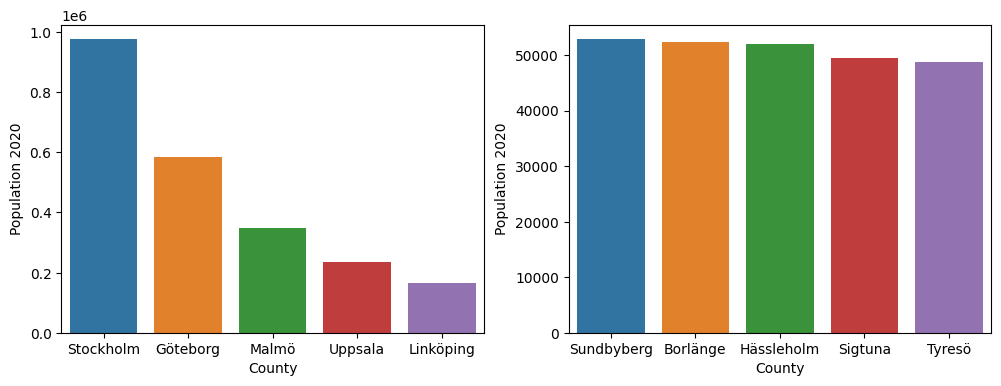

In [212]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(x="County", y="Population 2020", data=top_5_cities, ax=ax[0])
sns.barplot(
    x="County",
    y="Population 2020",
    data=bottom_5_cities,
    ax=ax[1]
)


---

## 3. Cities in Sweden - gender (*)

We continue with the same Excel-file as in task 2, but now you should also read in the sheets "Kvinnor" and "Män" into two additional DataFrames. In this task, many operations are similar to all three datasets, try creating custom made functions to reuse as much code as possible.

&nbsp; a) Clean your data so that the head looks like this: (*)

Male: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 |          81 |          83 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 |          64 |          64 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|  2 |         122 |         123 | Alvesta  |            10367 |            10339 |     0.270819 | Man   |
|  3 |         255 |         255 | Aneby    |             3503 |             3498 |     0.142939 | Man   |
|  4 |         169 |         168 | Arboga   |             7094 |             7114 |    -0.281136 | Man   |

Female: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:-------|
|  0 |          84 |          85 | Ale      |            15612 |            15348 |     1.72009  | Kvinna |
|  1 |          64 |          64 | Alingsås |            20900 |            20774 |     0.606527 | Kvinna |
|  2 |         123 |         123 | Alvesta  |             9857 |             9795 |     0.632976 | Kvinna |
|  3 |         255 |         255 | Aneby    |             3318 |             3350 |    -0.955224 | Kvinna |
|  4 |         165 |         164 | Arboga   |             6945 |             6973 |    -0.401549 | Kvinna |


&nbsp; b) Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now.  (*)

|    | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|   ...  | ...       | ...  | ...   | ...  | ...    |
| 288 | Överkalix    |             1559 |             1578 |    -1.20406  | Kvinna |
| 289 | Övertorneå   |             2027 |             2065 |    -1.84019  | Kvinna |

&nbsp; c) Extract and change column name from the total DataFrame so that the head look like this: (*) 

|    | Kommun   |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|---:|:---------|-----------------:|-----------------:|-------------------:|
|  0 | Ale      |            31868 |            31402 |           1.48398  |
|  1 | Alingsås |            41602 |            41420 |           0.439401 |
|  2 | Alvesta  |            20224 |            20134 |           0.447005 |
|  3 | Aneby    |             6821 |             6848 |          -0.394276 |
|  4 | Arboga   |            14039 |            14087 |          -0.34074  |

&nbsp; d) Merge this data with the data in b) so that the head look like this: (*)

| Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|:----------|-----------------:|-----------------:|-------------:|:-------|-----------------:|-----------------:|-------------------:|
| Stockholm |           482982 |           482220 |     0.158019 | Man    |           975551 |           974073 |           0.151734 |
| Stockholm |           492569 |           491853 |     0.145572 | Kvinna |           975551 |           974073 |           0.151734 |
| Göteborg  |           292505 |           290308 |     0.756782 | Man    |           583056 |           579281 |           0.65167  |
| Göteborg  |           290551 |           288973 |     0.546072 | Kvinna |           583056 |           579281 |           0.65167  |
| Malmö     |           175411 |           173543 |     1.07639  | Kvinna |           347949 |           344166 |           1.09918  |

&nbsp; e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities. (*) 
 
&nbsp; f) Create a pie chart showing the total male and female population in Sweden 2020. (*)

&nbsp; g) Create a barplot showing the cities with the five largest percentual gender difference in 2020. (**)

&nbsp; h) Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020 (**)

&nbsp; i) Feel free to investigate other questions you are interested in using these datasets. (*), (**)

<br/>

<details>

<summary>Hint</summary>

f) You need to process the data first. For example

- compute difference between males and females in 2020
- use this difference to compute the differences in percentage
- sort the values by this percentage difference
- use seaborn barplot to plot, with the gender as hue

</details>

<br/>

<details>

<summary>Answer</summary>

e)

<img src="../assets/population_gender.png" height="200"/>

f)

<img src="../assets/population_genders_pie.png" height="200"/>

g)

<img src="../assets/cities_largest_gender_diff.png" height="200"/>

h)

<img src="../assets/pop_change.png" height="200"/>

</details>


In [213]:
# imports just the sheet refering to woman population


df_female_pop = pd.read_excel("../Data/komtopp50_2020.xlsx", "Kvinnor", skiprows=6)

df_female_pop.rename(
    columns={
        2020: "Range 2020",
        2019: "Range 2019",
        "Unnamed: 2": "County",
        "2020.1": "Pop 2020",
        "2019.1": "Pop 2019",
        "%": "Change %",
    },
    inplace=True,
)

df_female_pop["Gender"] ="Female"
df_female_pop.head()

,Range 2020,Range 2019,County,Pop 2020,Pop 2019,Change %,Gender
0,84,85,Ale,15612,15348,1.720094,Female
1,64,64,Alingsås,20900,20774,0.606527,Female
2,123,123,Alvesta,9857,9795,0.632976,Female
3,255,255,Aneby,3318,3350,-0.955224,Female
4,165,164,Arboga,6945,6973,-0.401549,Female


In [214]:
df_male_pop = pd.read_excel("../Data/komtopp50_2020.xlsx", "Män", skiprows=6)

df_male_pop.rename(
    columns={
        "2020": "Range 2020",
        "2019": "Range 2019",
        "Unnamed: 2": "County",
        "2020.1": "Pop 2020",
        "2019.1": "Pop 2019",
        "%": "Change %",
    },
    inplace=True,
)

df_male_pop["Gender"] ="Male" # adds in extra column with male entry
df_male_pop.head()

,2020,2019,County,Pop 2020,Pop 2019,Change %,Gender
0,81,83,Ale,16256,16054,1.258253,Male
1,64,64,Alingsås,20702,20646,0.271239,Male
2,122,123,Alvesta,10367,10339,0.270819,Male
3,255,255,Aneby,3503,3498,0.142939,Male
4,169,168,Arboga,7094,7114,-0.281136,Male


In [215]:
df_male_female_pop = pd.concat([df_male_pop,df_female_pop])
df_male_female_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 0 to 289
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2020        290 non-null    float64
 1   2019        290 non-null    float64
 2   County      580 non-null    object 
 3   Pop 2020    580 non-null    int64  
 4   Pop 2019    580 non-null    int64  
 5   Change %    580 non-null    object 
 6   Gender      580 non-null    object 
 7   Range 2020  290 non-null    float64
 8   Range 2019  290 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 45.3+ KB
